Dynamical Structure Factor
(Still someting wrong)

In [179]:
from ase.io import read

atoms=read('optimized.vasp',format='vasp')

In [180]:
import numpy as np
natom=len(atoms.positions)
nmodes=natom*3
dyn_file='Dyn.form'
lammps_dyn=np.loadtxt(dyn_file).reshape((nmodes,nmodes))

In [181]:
eigenvalue, eigenvector=np.linalg.eigh(lammps_dyn)

In [182]:
def broadening(omega1, omega2, sigma):
    delta=1.0/np.pi*sigma/((omega1-omega2)**2+sigma*sigma)
    return delta

In [183]:
a_super=atoms.cell[0,0]
a0=a_super/4
a0

5.47232925

In [184]:
kmax=2.0*np.pi/a0
kmax

1.1481738433738407

In [185]:
omega_min=5.0
omega_max=100.0
nom=100
nwn=4
om=np.linspace(omega_min,omega_max,nom)
wn=np.array([kmax/4.0, kmax/2.0,3.0*kmax/4.0, kmax])

dsf_L=np.zeros([nwn,nom])
EL=np.zeros([nwn,nmodes])

In [186]:
wn

array([0.28704346, 0.57408692, 0.86113038, 1.14817384])

In [187]:
import pyAF.constants
pc=pyAF.constants.physical_constants()
omega=[]
#extract minimum index of negative frequency
mode_negative=0
for i in range(nmodes):
    if eigenvalue[i] <0.0:
        val=-np.sqrt(-eigenvalue[i])*pc.scale_cm
        omega.append(val)
        mode_negative=i
    else:
        val=np.sqrt(eigenvalue[i])*pc.scale_cm
        omega.append(val)

In [188]:
#test for single mode eigenvector
ind=10
partial=eigenvector[:,ind]
print(partial)
EL=np.zeros([nwn,nmodes])
for ik in range(nwn):
    k=np.array([wn[ik],0,0])
    contrib=0.0
    for j in range(natom):
        nstart=3*j
        nend=3*(j+1)
        disp=partial[nstart:nend]
        
        pos=atoms.positions[j]
        
        phase=np.exp(1.0j*np.dot(k,pos))
        polarlization=np.dot(k,disp)
        factor=phase*polarlization
        
        contrib=contrib+factor
    EL[ik,ind]=EL[ik,ind]+np.abs(contrib)**2/3

[-0.00855852 -0.06308095  0.00563376 ...  0.00027849  0.03054212
  0.02359806]


In [189]:
EL[:,ind]

array([0.00139433, 0.00258958, 0.00703895, 0.00172068])

In [190]:
omega[ind]

56.82848751736935

In [191]:
b=[]
for iw in range(nom):
    b.append(broadening(om[iw],omega[ind],sigma))

In [192]:
b

[0.00011845445809831006,
 0.00012296394189602238,
 0.0001277358880429459,
 0.00013279106377131692,
 0.00013815233138233724,
 0.0001438449070491834,
 0.00014989665769467992,
 0.00015633844248141518,
 0.00016320450674242172,
 0.00017053293776013974,
 0.00017836619374316637,
 0.00018675171974774253,
 0.0001957426672644555,
 0.0002053987378962145,
 0.00021578717619437774,
 0.00022698394256226556,
 0.0002390751045303625,
 0.0002521584941214475,
 0.00026634569107977633,
 0.00028176440727507493,
 0.0002985613677473673,
 0.0003169058101884551,
 0.0003369937593056829,
 0.00035905327846838504,
 0.0003833509624889836,
 0.00041020001828485583,
 0.000439970393026548,
 0.00047310156455702653,
 0.0005101188244887145,
 0.0005516541873765625,
 0.0005984734902799199,
 0.0006515118678372848,
 0.0007119206948888106,
 0.0007811304335687135,
 0.0008609358488343192,
 0.0009536131660152239,
 0.0010620836070258247,
 0.0011901455090664757,
 0.0013428099259950538,
 0.0015267959042746158,
 0.0017512783611316838,


In [193]:
dsf_L=np.zeros([nwn,nom])
sigma=0.5
for iw in range(nom):
    for ik in range(nwn):
        dsf_L[ik,iw]=dsf_L[ik,iw]+EL[ik,ind]*broadening(om[iw],omega[ind],sigma)

In [194]:
dsf_L[0,:]

array([8.26053680e-08, 8.57510117e-08, 8.90798120e-08, 9.26062684e-08,
       9.63463443e-08, 1.00317648e-07, 1.04539638e-07, 1.09033868e-07,
       1.13824254e-07, 1.18937401e-07, 1.24402965e-07, 1.30254094e-07,
       1.36527922e-07, 1.43266164e-07, 1.50515813e-07, 1.58329958e-07,
       1.66768758e-07, 1.75900607e-07, 1.85803520e-07, 1.96566807e-07,
       2.08293090e-07, 2.21100761e-07, 2.35126980e-07, 2.50531360e-07,
       2.67500527e-07, 2.86253799e-07, 3.07050303e-07, 3.30197972e-07,
       3.56065004e-07, 3.85094588e-07, 4.17824005e-07, 4.54909655e-07,
       4.97160202e-07, 5.45581007e-07, 6.01434446e-07, 6.66322966e-07,
       7.42305212e-07, 8.32061176e-07, 9.39131538e-07, 1.06827183e-06,
       1.22598900e-06, 1.42137603e-06, 1.66745012e-06, 1.98337339e-06,
       2.39828965e-06, 2.95827319e-06, 3.73964336e-06, 4.87628320e-06,
       6.62066703e-06, 9.49586002e-06, 1.47330024e-05, 2.58134360e-05,
       5.58562081e-05, 1.86371731e-04, 8.87281216e-04, 1.92776054e-04,
      

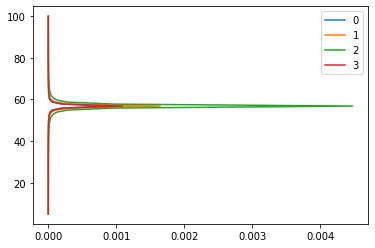

In [195]:
import matplotlib.pyplot as plt 
for ik in range(nwn):
    plt.plot(dsf_L[ik,:],om,label=str(ik))
plt.legend()

In [196]:
#[100] direction
dsf_L=np.zeros([nwn,nom])
EL=np.zeros([nwn,nmodes])

for ind, vec in enumerate(eigenvector.T):
    for ik in range(nwn):
        k=np.array([wn[ik],0,0])
        contrib=0.0
        for j in range(natom):
            nstart=3*j
            nend=3*(j+1)
            disp=vec[nstart:nend]
            pos=atoms.positions[j]
            phase=np.exp(1.0j*np.dot(k,pos))
            polarlization=np.dot(k,disp)
            factor=phase*polarlization
            contrib=contrib+factor

        EL[ik,ind]=EL[ik,ind]+np.abs(contrib)**2/3


In [197]:
EL[0,:]

array([1.07626509e-03, 4.11591204e-05, 8.46858757e-04, ...,
       1.01560523e-03, 1.07018554e-03, 8.57028808e-06])

In [210]:
sigma=0.1
for iw in range(nom):
    for ik in range(nwn):
        for ind in range(nmodes):
            dsf_L[ik,iw]=dsf_L[ik,iw]+EL[ik,ind]*broadening(om[iw],omega[ind],sigma)

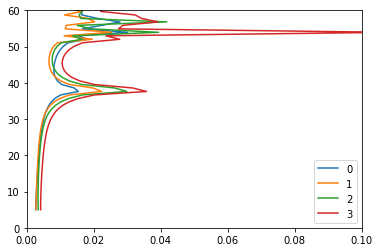

In [211]:
for ik in range(nwn):
    plt.plot(dsf_L[ik,:],om,label=str(ik))
plt.ylim(0,60)
plt.xlim(0,0.1)
plt.legend()

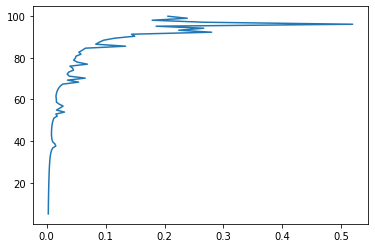

In [212]:
plt.plot(dsf_L[0,:],om,label=str(ik))

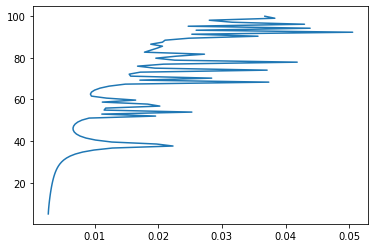

In [213]:
plt.plot(dsf_L[1,:],om,label=str(ik))

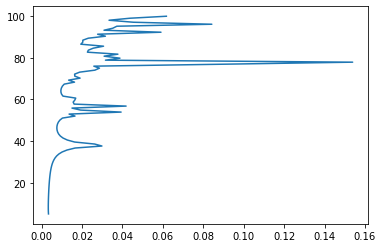

In [214]:
plt.plot(dsf_L[2,:],om,label=str(ik))

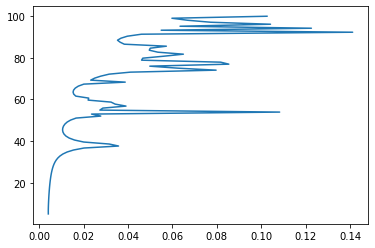

In [215]:
plt.plot(dsf_L[3,:],om,label=str(ik))